# ANÁLISE DE SÉRIES TEMPORAIS

In [2]:
import pandas as pd

path = r'C:\Users\Leonardo.Hoinaski\Documents\ENS410064\dados\brutos\metar.csv'
data = pd.read_csv(path)

data

,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh
0,1,1,2022,0,NaN,120.0,1.543332,914.40,1.0,1.0,1009.678792,23.0,21.0,NaN,0.0,88.51
1,1,1,2022,1,NaN,280.0,1.028888,NaN,NaN,NaN,1009.685980,20.0,20.0,NaN,0.0,100.00
2,1,1,2022,2,NaN,NaN,0.514444,NaN,NaN,NaN,1009.678792,22.0,21.0,NaN,0.0,94.06
3,1,1,2022,3,NaN,NaN,1.028888,457.20,1.0,1.0,1009.682386,21.0,21.0,NaN,0.0,100.00
4,1,1,2022,4,NaN,NaN,1.028888,NaN,NaN,NaN,1009.685980,22.0,20.0,NaN,0.0,88.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,30,12,2022,19,NaN,20.0,0.514444,1371.60,1.0,1.0,1009.658428,29.0,20.0,NaN,0.0,58.32
8729,30,12,2022,20,NaN,20.0,6.687772,1005.84,1.0,1.0,1009.662022,28.0,19.0,NaN,0.0,58.08
8730,30,12,2022,21,NaN,10.0,7.716660,762.00,1.0,1.0,1009.662022,27.0,19.0,NaN,0.0,61.58
8731,30,12,2022,22,NaN,10.0,5.658884,762.00,1.0,1.0,1009.658428,25.0,20.0,NaN,0.0,73.78


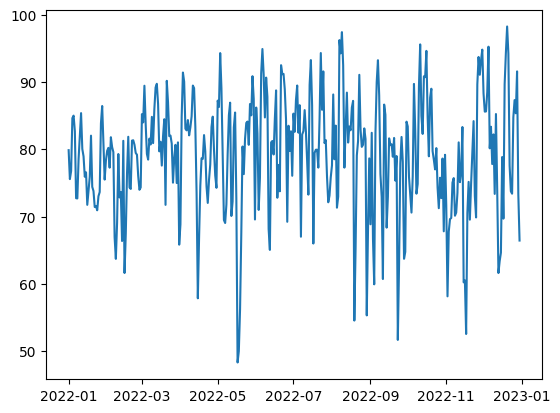

In [20]:
# Médias diárias
dailyAve = data.groupby(['year','month','day']).mean()
dailyAve = dailyAve.reset_index()
df = pd.DataFrame({'year': dailyAve['year'],
                   'month': dailyAve['month'],
                   'day': dailyAve['day']})
df = pd.to_datetime(df)
dailyAve['datetime'] = df
dailyAve = dailyAve.set_index(['datetime'])

# plot dailyAve umidade
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(dailyAve.index,dailyAve['relh'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=361277.640, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1035.578, Time=0.00 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1316.366, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=979.548, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1738.220, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=977.728, Time=0.02 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=4480.181, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=421748.821, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=962.952, Time=0.02 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=3612.998, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=964.980, Time=0.05 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=186003.140, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=965.745, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=970.558, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0

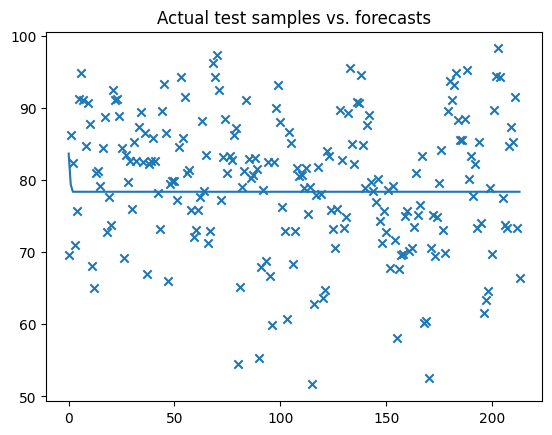

In [26]:
# SARIMAX
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
y = dailyAve['relh']
train, test = train_test_split(y, train_size=150)

# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(test.shape[0])
plt.scatter(x, test, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()


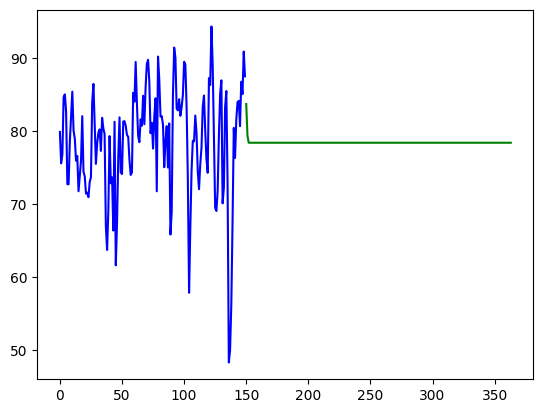

In [27]:
# make your forecasts
forecasts = arima.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

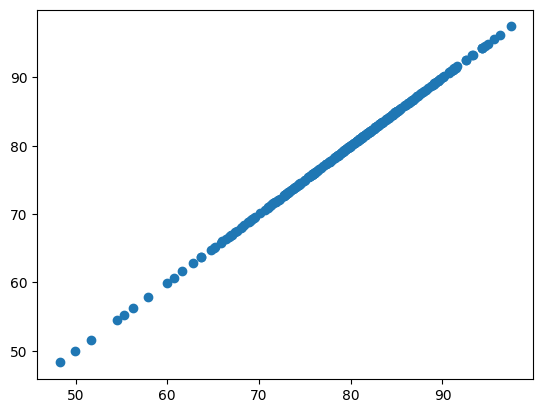

In [37]:
from sklearn import tree

y = dailyAve[['relh','ws','temp']]
train, test = train_test_split(y, train_size=300)


X = np.array(train[['ws','temp']])
Y = np.array(train['relh'])
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)
preds = clf.predict(X)

fig,ax = plt.subplots()
ax.scatter(Y,preds)

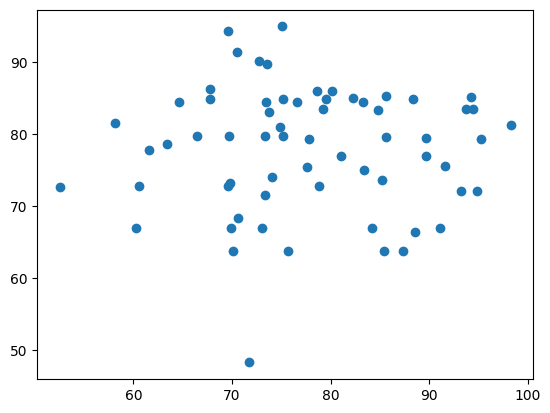

In [38]:
X = np.array(test[['ws','temp']])
Y = np.array(test['relh'])
preds = clf.predict(X)

fig,ax = plt.subplots()
ax.scatter(Y,preds)


In [41]:
from sklearn.neural_network import MLPRegressor
X = np.array(train[['ws','temp']])
Y = np.array(train['relh'])
regr = MLPRegressor(random_state=1, max_iter=1000).fit(X, Y)


C:\Users\Leonardo.Hoinaski\Documents\polatm\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


# ANÁLISE DE DADOS NO ESPAÇO

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt

<Axes: >

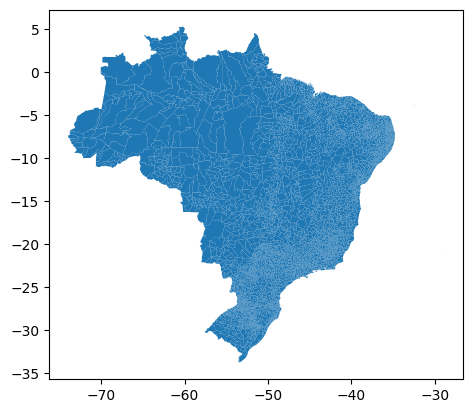

In [50]:
br = gpd.read_file(r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\dados\BR_Municipios_2022\BR_Municipios_2022.shp")
fig,ax = plt.subplots()
br.plot(ax=ax)

In [51]:
br

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.31170 -16.8..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.07780 -15.06364, -47.07799 -15.0..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


<Axes: >

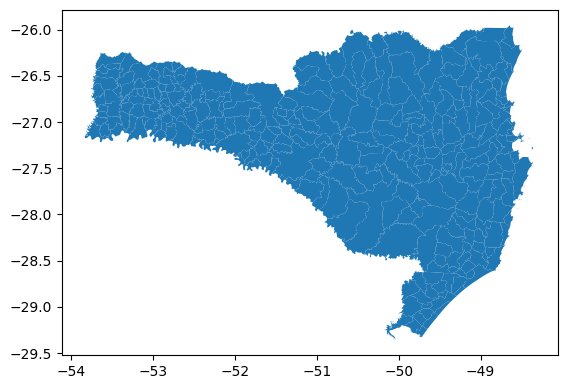

In [52]:
br[br['SIGLA_UF']=='SC'].plot()

In [79]:
#br[br['SIGLA_UF']=='SC'].explore('AREA_KM2')

## Análise de um raster

In [75]:
import rasterio
import rioxarray as rioxr
from affine import Affine

In [58]:
path =r"C:\Users\Leonardo.Hoinaski\Documents\ENS410064\dados\brasil_coverage_2022.tif"
dataset = rasterio.open(path)

In [80]:
dataRaster = rioxr.open_rasterio(path)
dataRaster.shape

(1, 158459, 155239)

In [87]:
br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1)

clipped = dataRaster.rio.clip(br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1))

C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_20096\635699789.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1)
C:\Users\Leonardo.Hoinaski\AppData\Local\Temp\ipykernel_20096\635699789.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clipped = dataRaster.rio.clip(br[br['NM_MUN']=='Florianópolis'].geometry.buffer(1))


MemoryError: Unable to allocate 22.9 GiB for an array with shape (158459, 155239) and data type uint8